In [1]:
#required packages
!pip install pandas
!pip install pyarrow

In [1]:
def load(fname):
    import pandas as pd
    df = pd.read_parquet(fname).set_index(['CHROM','POS'])
    columns = pd.DataFrame(map(lambda x: x.split('_'),df.columns),columns=['POP','GEN','REP','READ']).astype({'REP':int,'GEN':int})
    df.columns = pd.MultiIndex.from_arrays(columns.T.values,names=columns.columns)
    return df
df = load('flyEE.pq')
df

POP              C                                       ...   L           \
GEN            4                        17               ... 149            
REP              1       2        3       1       2      ...   2        3   
READ             C   D   C    D   C   D   C   D   C   D  ...   C    D   C   
CHROM POS                                                ...                
2L    530022     0   9   0  107   4  64   0  74   5  87  ...  10  110   0   
      530029     2   8  41  126  15  61  15  72  26  86  ...  51  111  37   
      530095     0  14   0   97   0  52   0  49   0  73  ...   0  107   0   
      530106     6  14  30   97  25  52  11  47  35  71  ...  50  114  34   
      530108     6  14  30   94  24  50  11  47  35  70  ...  52  115  35   
...             ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ...  ..  ...  ..   
X     21209684   3  19  32  137  12  56  26  59  17  84  ...   0   59   0   
      21209747   2  14  15  128   0  52   0  49   9  80  ...   0   59   0   
      21209759   0  11   0  103   0  56   0  48   3  75  ...   0   59   0   
      21209875   0  15   6  112   3  58   0  48   0  65  ...   0   59   0   
      21209876   2  14  30  114  17  58  33  82  20  86  ...   0   59   0   

POP                                          
GEN                 180                      
REP                   1       2       3      
READ              D   C   D   C   D   C   D  
CHROM POS                                    
2L    530022     95   3  51   5  51   0  59  
      530029    111  12  51  23  52  12  69  
      530095    107   0  40   0  45   0  71  
      530106    112  14  44  29  56  11  86  
      530108    112  14  44  29  59  11  86  
...             ...  ..  ..  ..  ..  ..  ..  
X     21209684   54   0  36   0  37   0  38  
      21209747   54   0  36   0  37   0  36  
      21209759   54   0  36   0  37   0  36  
      21209875   54   0  36   0  23   0  28  
      21209876   54   0  36   0  23   0  28  

[2176825 rows x 118 columns]

POP              C                                       ...   L           \
GEN            4                        17               ... 149            
REP              1       2        3       1       2      ...   2        3   
READ             C   D   C    D   C   D   C   D   C   D  ...   C    D   C   
CHROM POS                                                ...                
2L    530022     0   9   0  107   4  64   0  74   5  87  ...  10  110   0   
      530029     2   8  41  126  15  61  15  72  26  86  ...  51  111  37   
      530095     0  14   0   97   0  52   0  49   0  73  ...   0  107   0   
      530106     6  14  30   97  25  52  11  47  35  71  ...  50  114  34   
      530108     6  14  30   94  24  50  11  47  35  70  ...  52  115  35   
...             ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ...  ..  ...  ..   
X     21209684   3  19  32  137  12  56  26  59  17  84  ...   0   59   0   
      21209747   2  14  15  128   0  52   0  49   9  80  ...   0   59   0   
      21209759   0  11   0  103   0  56   0  48   3  75  ...   0   59   0   
      21209875   0  15   6  112   3  58   0  48   0  65  ...   0   59   0   
      21209876   2  14  30  114  17  58  33  82  20  86  ...   0   59   0   

POP                                          
GEN                 180                      
REP                   1       2       3      
READ              D   C   D   C   D   C   D  
CHROM POS                                    
2L    530022     95   3  51   5  51   0  59  
      530029    111  12  51  23  52  12  69  
      530095    107   0  40   0  45   0  71  
      530106    112  14  44  29  56  11  86  
      530108    112  14  44  29  59  11  86  
...             ...  ..  ..  ..  ..  ..  ..  
X     21209684   54   0  36   0  37   0  38  
      21209747   54   0  36   0  37   0  36  
      21209759   54   0  36   0  37   0  36  
      21209875   54   0  36   0  23   0  28  
      21209876   54   0  36   0  23   0  28  

[2176825 rows x 118 columns]

In [8]:
# C and D are alternate read count and total coverage, respectively
import seaborn as sns
coverage_Hpopulation = df.H.xs('D',axis=1,level=2)

display(coverage_Hpopulation) 


GEN             1              7              12             15   ...  61   \
REP               1    2    3    1    2    3    1    2    3    2  ...    3   
CHROM POS                                                         ...        
2L    530022    134  106  122  157  144  146  100  131  135  111  ...  121   
      530029    135  103  121  150  134  151  104  133  136  116  ...  126   
      530095    117   94  111  124  109  126   92  114  133  123  ...  111   
      530106    118   99  107  122  106  126   93  115  139  119  ...  111   
      530108    119   96  108  122  105  128   93  116  138  123  ...  111   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
X     21209684  125  117  120  172  131  133  117  118  125  142  ...  135   
      21209747  120   98  117  153  126  138  122  115  122  136  ...  117   
      21209759  119   98  116  160  135  148  107  115  124  119  ...  111   
      21209875  125   98  106  165  131  148  104  125  124  141  ...  117   
      21209876  125  106  121  165  129  192  105  124  130  138  ...  117   

GEN            114            162           180          
REP              1    2    3    1    2    3   1   2   3  
CHROM POS                                                
2L    530022    85  162  141  120  114  103  57  60  66  
      530029    84  163  141  121  121  108  57  60  65  
      530095    83  133  130  117  105  111  57  41  40  
      530106    83  133  130  117  105  111  43  41  40  
      530108    83  133  130  117  105  111  43  41  40  
...             ..  ...  ...  ...  ...  ...  ..  ..  ..  
X     21209684  76  152   92   55   85   85  37  37  36  
      21209747  76  114   92   55   79   85  37  36  31  
      21209759  76  114   92   55   79   85  37  35  32  
      21209875  76  118   92   55   84   85  31  28  48  
      21209876  76  116   92   55   84   85  31  28  48  

[2176825 rows x 26 columns]

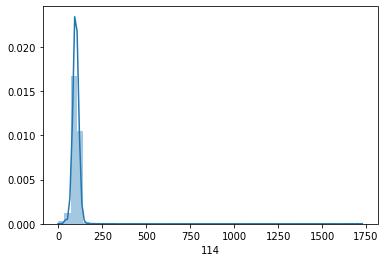

In [10]:
coverage_Hpopulation_r1=coverage_Hpopulation.xs(1,axis=1,level=1) # replicate 1

sns.distplot(coverage_Hpopulation_r1[114])

In [11]:
#alelle frequency
af=df.xs('C',axis=1,level=3)/df.xs('D',axis=1,level=3)
af

POP                    C                                                    \
GEN                  4                             17                        
REP                    1         2         3         1         2         3   
CHROM POS                                                                    
2L    530022    0.000000  0.000000  0.062500  0.000000  0.057471  0.000000   
      530029    0.250000  0.325397  0.245902  0.208333  0.302326  0.282051   
      530095    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      530106    0.428571  0.309278  0.480769  0.234043  0.492958  0.546667   
      530108    0.428571  0.319149  0.480000  0.234043  0.500000  0.567568   
...                  ...       ...       ...       ...       ...       ...   
X     21209684  0.157895  0.233577  0.214286  0.440678  0.202381  0.185567   
      21209747  0.142857  0.117188  0.000000  0.000000  0.112500  0.000000   
      21209759  0.000000  0.000000  0.000000  0.000000  0.040000  0.160920   
      21209875  0.000000  0.053571  0.051724  0.000000  0.000000  0.000000   
      21209876  0.142857  0.263158  0.293103  0.402439  0.232558  0.294737   

POP                                        H  ...         L            \
GEN                  180                 1    ...       91        117   
REP                    1    2    3         1  ...         3         1   
CHROM POS                                     ...                       
2L    530022    0.000000  0.0  0.0  0.156716  ...  0.000000  0.055556   
      530029    0.000000  0.0  0.0  0.414815  ...  0.136842  0.212766   
      530095    0.000000  0.0  0.0  0.000000  ...  0.000000  0.000000   
      530106    0.324324  0.0  0.0  0.516949  ...  0.212766  0.224490   
      530108    0.315789  0.0  0.0  0.521008  ...  0.221053  0.226804   
...                  ...  ...  ...       ...  ...       ...       ...   
X     21209684  0.000000  0.0  0.0  0.232000  ...  0.000000  0.000000   
      21209747  0.000000  0.0  0.0  0.000000  ...  0.000000  0.000000   
      21209759  0.000000  0.0  0.0  0.092437  ...  0.000000  0.000000   
      21209875  0.000000  0.0  0.0  0.048000  ...  0.000000  0.000000   
      21209876  0.000000  0.0  0.0  0.416000  ...  0.000000  0.000000   

POP                                                                         \
GEN                                      149                           180   
REP                    2         3         1         2         3         1   
CHROM POS                                                                    
2L    530022    0.121212  0.057692  0.000000  0.090909  0.000000  0.058824   
      530029    0.469697  0.130841  0.413462  0.459459  0.333333  0.235294   
      530095    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      530106    0.476190  0.229358  0.370968  0.438596  0.303571  0.318182   
      530108    0.469697  0.231481  0.368852  0.452174  0.312500  0.318182   
...                  ...       ...       ...       ...       ...       ...   
X     21209684  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      21209747  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      21209759  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      21209875  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      21209876  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

POP                                 
GEN                                 
REP                    2         3  
CHROM POS                           
2L    530022    0.098039  0.000000  
      530029    0.442308  0.173913  
      530095    0.000000  0.000000  
      530106    0.517857  0.127907  
      530108    0.491525  0.127907  
...                  ...       ...  
X     21209684  0.000000  0.000000  
      21209747  0.000000  0.000000  
      21209759  0.000000  0.000000  
      21209875  0.000000  0.000000  
      21209876  0.000000  0.000000  

[21768